In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ds = pd.read_csv('diabetes.csv')

In [3]:
print(ds.columns)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [4]:
ds.shape

(768, 9)

In [5]:
col_names = list(ds.columns.values)
col_names.remove('Outcome')
col_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
ds.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
ds.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [10]:
X_train, X_test, y_train, y_test = train_test_split(ds.iloc[:,0:8],ds.iloc[:,-1],stratify=ds.iloc[:,-1], random_state=66)


In [11]:
train_accuracy = []
test_accuracy = []
neighbour_nos = range(1,11);

In [12]:
for n in neighbour_nos:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    train_accuracy.append(round(knn.score(X_train, y_train),3))
    test_accuracy.append(round(knn.score(X_test, y_test),3))

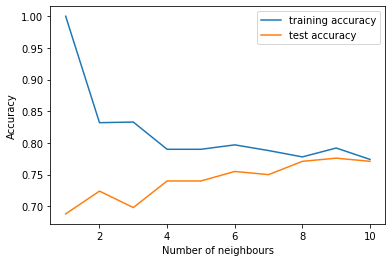

In [13]:
plt.plot(neighbour_nos, train_accuracy, label="training accuracy")
plt.plot(neighbour_nos, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of neighbours")
plt.legend()

In [14]:
knn_acc = {'Clusters' : list(neighbour_nos),
          'Training set Accuracy' : train_accuracy,
          'Testing set Acuuracy' : test_accuracy}
df = pd.DataFrame(knn_acc)

In [15]:
df

,Clusters,Training set Accuracy,Testing set Acuuracy
0,1,1.000,0.688
1,2,0.832,0.724
2,3,0.833,0.698
3,4,0.790,0.740
4,5,0.790,0.740
5,6,0.797,0.755
6,7,0.788,0.750
7,8,0.778,0.771
8,9,0.792,0.776
9,10,0.774,0.771


In [16]:
#  overfitting till n = 3 , on adding more number of clusters the accuracy is almost

In [17]:
tree = DecisionTreeClassifier(random_state = 0)
# tree.get_depth()

In [18]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [19]:
print(tree.score(X_train,y_train))
print(round(tree.score(X_test,y_test),2))

1.0
0.71


In [20]:
# overfitting

In [21]:
tree.get_depth()

13

In [22]:
tree_dep = range(1,14)
tree_test = []
tree_train = []

In [23]:
for i in tree_dep:
    tree = DecisionTreeClassifier(max_depth = i,random_state = 0)
    tree.fit(X_train,y_train)
    tree_train.append(round(tree.score(X_train,y_train),3))
    tree_test.append(round(tree.score(X_test,y_test),3))

In [24]:
tree_acc = {'Depth' : list(tree_dep),
           'Training set Accuracy' : tree_train,
           'Testing Set Accuracy' : tree_test}

tree_df = pd.DataFrame(tree_acc)

In [25]:
tree_df

,Depth,Training set Accuracy,Testing Set Accuracy
0,1,0.726,0.708
1,2,0.773,0.740
2,3,0.773,0.740
3,4,0.807,0.734
4,5,0.845,0.750
5,6,0.875,0.734
6,7,0.908,0.740
7,8,0.927,0.740
8,9,0.955,0.724
9,10,0.972,0.724


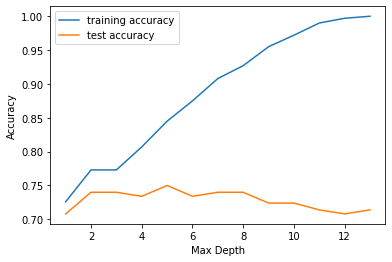

In [26]:
plt.plot(tree_dep, tree_train, label="training accuracy")
plt.plot(tree_dep, tree_test, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Max Depth")
plt.legend()

In [27]:
log_mod = LogisticRegression(random_state = 0, max_iter =200)

In [28]:
log_mod.fit(X_train,y_train)

LogisticRegression(max_iter=200, random_state=0)

In [29]:
print(log_mod.score(X_train,y_train))
print(log_mod.score(X_test,y_test))

0.7847222222222222
0.7708333333333334


In [30]:
iter = range(200,1001,100)
log_train =[]
log_test = []


In [31]:
for i in iter:
    log_mod = LogisticRegression(random_state = 0, max_iter =i)
    log_mod.fit(X_train,y_train)
    log_train.append(round(log_mod.score(X_train,y_train),3))
    log_test.append(round(log_mod.score(X_test,y_test),3))

In [32]:
log_df = {'No. of iter' : list(iter),
         'Training set accuracy' : log_train,
         'Test set accuracy' : log_test}
lg_df = pd.DataFrame(log_df)

In [33]:
lg_df

,No. of iter,Training set accuracy,Test set accuracy
0,200,0.785,0.771
1,300,0.785,0.771
2,400,0.785,0.771
3,500,0.785,0.771
4,600,0.785,0.771
5,700,0.785,0.771
6,800,0.785,0.771
7,900,0.785,0.771
8,1000,0.785,0.771


In [34]:
rf_mod = RandomForestClassifier(n_estimators = 1000,random_state = 0)

In [35]:
rf_mod.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [36]:
rf_mod.score(X_train,y_train)

1.0

In [37]:
rf_mod.score(X_test,y_test)

0.796875

In [38]:
rf_iter = range(100,1001,100)
rf_train =[]
rf_test = []

In [39]:
for i in rf_iter:
    rf_mod = RandomForestClassifier(n_estimators = i,random_state = 0)
    rf_mod.fit(X_train,y_train)
    rf_train.append(round(rf_mod.score(X_train,y_train),3))
    rf_test.append(round(rf_mod.score(X_test,y_test),3))

In [40]:
rf_df = {'No. of trees' : list(rf_iter),
         'Training set accuracy' : rf_train,
         'Test set accuracy' : rf_test}
rff_df = pd.DataFrame(rf_df)

In [41]:
rff_df

,No. of trees,Training set accuracy,Test set accuracy
0,100,1.0,0.786
1,200,1.0,0.786
2,300,1.0,0.792
3,400,1.0,0.786
4,500,1.0,0.797
5,600,1.0,0.797
6,700,1.0,0.797
7,800,1.0,0.797
8,900,1.0,0.797
9,1000,1.0,0.797


In [42]:
rf_iter1 = range(1,11)
rf_train1 =[]
rf_test1 = []

In [43]:
for i in rf_iter1:
    rf_mod = RandomForestClassifier(n_estimators = 500,max_depth = i,random_state = 0)
    rf_mod.fit(X_train,y_train)
    rf_train1.append(round(rf_mod.score(X_train,y_train),3))
    rf_test1.append(round(rf_mod.score(X_test,y_test),3))

In [44]:
rf_df1 = {'No. of trees' : list(rf_iter1),
         'Training set accuracy' : rf_train1,
         'Test set accuracy' : rf_test1}
rff_df1 = pd.DataFrame(rf_df1)

In [45]:
rff_df1

,No. of trees,Training set accuracy,Test set accuracy
0,1,0.701,0.693
1,2,0.773,0.755
2,3,0.799,0.745
3,4,0.828,0.750
4,5,0.844,0.771
5,6,0.889,0.776
6,7,0.939,0.766
7,8,0.969,0.771
8,9,0.984,0.781
9,10,0.998,0.797


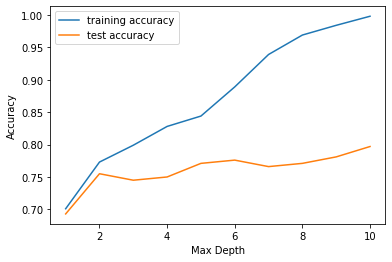

In [46]:
plt.plot(rf_iter1, rf_train1, label="training accuracy")
plt.plot(rf_iter1, rf_test1, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Max Depth")
plt.legend()

In [47]:
# we will finally use logistic regression


In [48]:
# type(log_mod.coef_)

In [49]:
feat_imp = {'Feature name' : np.array(col_names),
           'feature imp' : log_mod.coef_[0]}
fea_imp = pd.DataFrame(feat_imp)

In [50]:
# len(log_mod.coef_[0])
# len(np.array(col_names))

In [51]:
fea_imp

,Feature name,feature imp
0,Pregnancies,0.107328
1,Glucose,0.035946
2,BloodPressure,-0.011239
3,SkinThickness,-0.001236
4,Insulin,-0.001013
5,BMI,0.093973
6,DiabetesPedigreeFunction,0.823516
7,Age,0.007814


<BarContainer object of 8 artists>

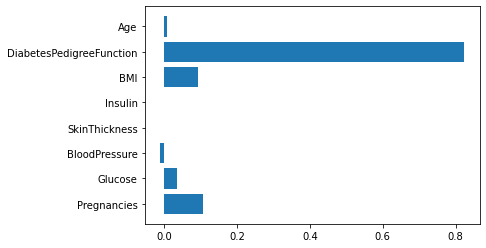

In [52]:
plt.barh(fea_imp['Feature name'],fea_imp['feature imp'])

# Final model and everything


In [53]:
log_mod = LogisticRegression(random_state = 0, max_iter =200)

In [54]:
log_mod.fit(X_train,y_train)

LogisticRegression(max_iter=200, random_state=0)

In [55]:
print(log_mod.score(X_train,y_train))
print(log_mod.score(X_test,y_test))

0.7847222222222222
0.7708333333333334


In [56]:
iter = range(200,1001,100)
log_train =[]
log_test = []


In [57]:
for i in iter:
    log_mod = LogisticRegression(random_state = 0, max_iter =i)
    log_mod.fit(X_train,y_train)
    log_train.append(round(log_mod.score(X_train,y_train),3))
    log_test.append(round(log_mod.score(X_test,y_test),3))

In [58]:
log_df = {'No. of iter' : list(iter),
         'Training set accuracy' : log_train,
         'Test set accuracy' : log_test}
lg_df = pd.DataFrame(log_df)
lg_df

,No. of iter,Training set accuracy,Test set accuracy
0,200,0.785,0.771
1,300,0.785,0.771
2,400,0.785,0.771
3,500,0.785,0.771
4,600,0.785,0.771
5,700,0.785,0.771
6,800,0.785,0.771
7,900,0.785,0.771
8,1000,0.785,0.771


# Tuning hyperparameters

In [59]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [60]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
iterations = [500]

In [61]:
grid = dict(solver = solvers,penalty = penalty,C=c_values,max_iter = iterations)


In [62]:
# cv = RepeatedStratifiedKFold(n_splits = 10)

In [63]:
grid_search = GridSearchCV(estimator = model,param_grid = grid, cv = 3,scoring = 'accuracy')

In [64]:
res = grid_search.fit(X_train,y_train)

In [65]:
print("Best: %f using %s" % (res.best_score_,res.best_params_))


Best: 0.772569 using {'C': 100, 'max_iter': 500, 'penalty': 'l2', 'solver': 'newton-cg'}


In [66]:
means = res.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
params = res.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))

0.772569 with: {'C': 100, 'max_iter': 500, 'penalty': 'l2', 'solver': 'newton-cg'}
0.772569 with: {'C': 100, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
0.770833 with: {'C': 100, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
0.772569 with: {'C': 10, 'max_iter': 500, 'penalty': 'l2', 'solver': 'newton-cg'}
0.772569 with: {'C': 10, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
0.763889 with: {'C': 10, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
0.767361 with: {'C': 1.0, 'max_iter': 500, 'penalty': 'l2', 'solver': 'newton-cg'}
0.765625 with: {'C': 1.0, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
0.763889 with: {'C': 1.0, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
0.769097 with: {'C': 0.1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'newton-cg'}
0.769097 with: {'C': 0.1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
0.734375 with: {'C': 0.1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
0.765625 with: {'C': 0.

## doing for test set

In [67]:
test_res = grid_search.fit(X_test,y_test)

In [68]:
print("Best: %f using %s" % (test_res.best_score_,test_res.best_params_))


Best: 0.744792 using {'C': 0.1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'newton-cg'}


### on doing hp tuning we found that the parametrs used by default gicves the best accuracy so we will use them only


In [69]:
#pickeling the model for later use

In [70]:
# log_mod = LogisticRegression(random_state = 0, max_iter =500)
# log_mod.fit(X_train,y_train)

In [71]:
import pickle

In [73]:
# pickle.dump(log_mod,open('logistic_mod2.pkl','wb'))